# WeatherPy
----

## Observable Trends
1: There appears to be a parabolic relationship between a city's maximum temperautre and the latitude coordinate of the city. Generally speaking, that makes sense as latitude is a measure of distance from the equator, and it gets hotter the closer you are to the equator. Despite that generality, it seems the peak maximum temperatures seems to be roughly 30 degrees north, and not at 0.

2: Other than temperature versus latitude, there does not appear to be any discernible relationship between latitude and any other weather metric: humidity, percentage of cloudiness, and wind speed.

3: There appears to be more higher humidity cities in the northern hemisphere, but there are significantly more city data in the northern hempisphere than the southern hemisphere. There are only 175 city data in the southern hempsihere, compared to 397 city data in the northern hemisphere.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
api_key = "c280ce5700cf1679dcce087b5b74f838"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

In [45]:
print(cities)

['atuona', 'albany', 'trairi', 'illoqqortoormiut', 'mataura', 'qaanaaq', 'hobart', 'ushuaia', 'barrow', 'the valley', 'richards bay', 'avarua', 'yellowknife', 'palaikastron', 'tual', 'lebu', 'bethel', 'zambezi', 'saint-philippe', 'tessalit', 'sentyabrskiy', 'bathsheba', 'provideniya', 'oranjemund', 'rikitea', 'hermanus', 'saskylakh', 'astara', 'cape town', 'tiksi', 'saleaula', 'luganville', 'kapaa', 'nikolskoye', 'khatanga', 'kaitangata', 'mar del plata', 'bukachacha', 'fort nelson', 'jamestown', 'ribeira grande', 'quatre cocos', 'rawson', 'gorno-chuyskiy', 'koraput', 'rochegda', 'leningradskiy', 'oudtshoorn', 'kuryk', 'busselton', 'carnarvon', 'kodiak', 'odienne', 'kungalv', 'puerto ayora', 'luderitz', 'bejar', 'punta arenas', 'katsuura', 'bambous virieux', 'korla', 'cabo san lucas', 'ituacu', 'nemuro', 'margate', 'easthampton', 'tura', 'souillac', 'gold coast', 'inhambane', 'matara', 'panaba', 'pisco', 'vaini', 'esperance', 'mandalgovi', 'melchor de mencos', 'sri aman', 'severo-kuril

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "&appid=" + api_key + "&q=" 

In [74]:


# create empty lists 
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
#loop through lists
for city in cities:
    response = requests.get(query_url + city)
    response_json = response.json()
    try:
        city_name.append(response_json['name'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        print(f"City: {response_json['name']}. City ID: {response_json['id']}")
    except KeyError:
        pass
        print("City: not found")
        

City: Atuona. City ID: 4020109
City: Albany. City ID: 5106841
City: Trairi. City ID: 3386177
City not found
City: Mataura. City ID: 6201424
City: Qaanaaq. City ID: 3831208
City: Hobart. City ID: 2163355
City: Ushuaia. City ID: 3833367
City: Barrow. City ID: 5880054
City: The Valley. City ID: 3573374
City: Richards Bay. City ID: 962367
City: Avarua. City ID: 4035715
City: Yellowknife. City ID: 6185377
City: Palekastro. City ID: 256155
City: Tual. City ID: 1623197
City: Lebu. City ID: 3883457
City: Bethel. City ID: 5282297
City: Zambezi. City ID: 895953
City: Saint-Philippe. City ID: 935215
City: Tessalit. City ID: 2449893
City not found
City: Bathsheba. City ID: 3374083
City: Provideniya. City ID: 4031574
City: Oranjemund. City ID: 3354071
City: Rikitea. City ID: 4030556
City: Hermanus. City ID: 3366880
City: Saskylakh. City ID: 2017155
City: Astara. City ID: 148442
City: Cape Town. City ID: 3369157
City: Tiksi. City ID: 2015306
City not found
City: Luganville. City ID: 2136150
City: Ka

City: Warrnambool. City ID: 2144528
City: Te Anau. City ID: 2181625
City: Payakumbuh. City ID: 1631905
City: Vytegra. City ID: 469960
City: São Filipe. City ID: 3374210
City: Port Elizabeth. City ID: 964420
City: Constitución. City ID: 3893726
City: Mandalī. City ID: 93709
City: Volksrust. City ID: 943032
City: Kahului. City ID: 5847411
City not found
City: Loughrea. City ID: 2962800
City: Sitka. City ID: 5557293
City: Mayo. City ID: 4362001
City: Barroquinha. City ID: 3406041
City: Lompoc. City ID: 5367788
City: Port Keats. City ID: 2063039
City: Buchanan. City ID: 2278158
City not found
City: Xunchang. City ID: 1787901
City not found
City: Omsukchan. City ID: 2122493
City: Bintulu. City ID: 1737486
City: Prince Rupert. City ID: 6113406
City: Teluk Nibung. City ID: 1213493
City: Coyhaique. City ID: 3894426
City: Gorin. City ID: 2023943
City: Cairns. City ID: 2172797
City: Caucaia. City ID: 3402429
City: Saldanha. City ID: 3361934
City: Mariehamn. City ID: 3041732
City: Antofagasta. Ci

City: Tibiri. City ID: 2438774
City: Kampene. City ID: 214575
City: Plettenberg Bay. City ID: 964712
City: Laureles. City ID: 4705564
City: Padang. City ID: 1633419
City: Comodoro Rivadavia. City ID: 3860443
City: Feijó. City ID: 3664243
City: Kemijärvi. City ID: 653272
City: Kanniyākumāri. City ID: 1268008
City not found
City: Srandakan. City ID: 1626493
City: Srednekolymsk. City ID: 2121025
City: Santo Ângelo. City ID: 3449696
City: Evensk. City ID: 2125693
City: Ust'-Kut. City ID: 2013923
City: Hīt. City ID: 95788
City not found
City not found
City: Oodweyne. City ID: 53372
City: Elliot. City ID: 1005781
City: Aitape. City ID: 2101169
City: North Bend. City ID: 5742974
City: Kumul. City ID: 1529484
City: Great Yarmouth. City ID: 2647984
City: Bratsk. City ID: 2051523
City: Kantunilkín. City ID: 3822702
City: Dobšiná. City ID: 724893
City: Muros. City ID: 3115824
City: Luanda. City ID: 2240449
City: Skjervøy. City ID: 777682
City: Jatibonico. City ID: 3556334
City: Maputo. City ID: 1

In [176]:
# print(response_json)

In [75]:
# # # test to make sure things work
# # test_city='New York'
# test_query_url = url + "appid=" + api_key + "&q=" + city

# weather_response = requests.get(test_query_url)
# weather_json = weather_response.json()

# # # Get the temperature from the response
# # print(f"The weather API responded with: {weather_json}.")
# pprint(weather_json)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [83]:
#make a dictionary and turn it into a dataframe
weather_dict = {"City": city_name, 
                "Lat": lat, 
                "Long": lng, 
                "Max Temp": max_temp, 
                "Humidity": humidity, 
                "Cloudiness (%)": cloudiness, 
                "Wind Speed (m/s)": wind_speed, 
                "Country": country, 
                "Date": date}

weather_df = pd.DataFrame(weather_dict)
# weather_pd.head(15)
weather_df.count()
weather_df.to_csv('weather_df.csv', index=False)
new_df=pd.read_csv('weather_df.csv')
weather_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Atuona,-9.80,-139.03,299.33,78,11,9.96,PF,1596041118
1,Albany,42.60,-73.97,304.26,33,6,2.57,US,1596040879
2,Trairi,-3.28,-39.27,303.04,51,0,6.38,BR,1596041118
3,Mataura,-46.19,168.86,281.88,90,100,1.63,NZ,1596041227
4,Qaanaaq,77.48,-69.36,279.09,73,73,0.90,GL,1596041227
...,...,...,...,...,...,...,...,...,...
567,Hitoyoshi,32.22,130.75,295.22,86,0,0.58,JP,1596041461
568,Namatanai,-3.67,152.43,299.27,79,9,2.18,PG,1596041462
569,Serebryansk,49.69,83.29,291.15,77,75,3.00,KZ,1596041462
570,Sittwe,20.15,92.90,301.30,85,100,3.61,MM,1596041462


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [50]:
print(city_name)

['Atuona', 'Albany', 'Trairi', 'Mataura', 'Qaanaaq', 'Hobart', 'Ushuaia', 'Barrow', 'The Valley', 'Richards Bay', 'Avarua', 'Yellowknife', 'Palekastro', 'Tual', 'Lebu', 'Bethel', 'Zambezi', 'Saint-Philippe', 'Tessalit', 'Bathsheba']


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [88]:
weather_df.loc[(weather_df['Humidity']>100)]
#no cities with humidity above 100%

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date


In [94]:
#  Get the indices of cities that have humidity over 100%.
humidity_outlier = weather_df.loc[(weather_df['Humidity']>100)].index.tolist()
humidity_outlier

[]

In [99]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
weather_df_cleaned=weather_df.drop(humidity_outlier)
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df_cleaned

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Atuona,-9.80,-139.03,299.33,78,11,9.96,PF,1596041118
1,Albany,42.60,-73.97,304.26,33,6,2.57,US,1596040879
2,Trairi,-3.28,-39.27,303.04,51,0,6.38,BR,1596041118
3,Mataura,-46.19,168.86,281.88,90,100,1.63,NZ,1596041227
4,Qaanaaq,77.48,-69.36,279.09,73,73,0.90,GL,1596041227
...,...,...,...,...,...,...,...,...,...
567,Hitoyoshi,32.22,130.75,295.22,86,0,0.58,JP,1596041461
568,Namatanai,-3.67,152.43,299.27,79,9,2.18,PG,1596041462
569,Serebryansk,49.69,83.29,291.15,77,75,3.00,KZ,1596041462
570,Sittwe,20.15,92.90,301.30,85,100,3.61,MM,1596041462


In [108]:
# Extract relevant fields from the data frame
weather_df_cleaned

cleaned_lat=weather_df_cleaned['Lat']
cleaned_max_temp=weather_df_cleaned['Max Temp']
cleaned_city_name = weather_df_cleaned['City']
cleaned_lng = weather_df_cleaned['Long']
cleaned_humidity = weather_df_cleaned['Humidity']
cleaned_cloudiness = weather_df_cleaned['Cloudiness (%)']
cleaned_wind_speed = weather_df_cleaned['Wind Speed (m/s)']
cleaned_country = weather_df_cleaned['Country']
cleaned_date = weather_df_cleaned['Date']

# Export the City_Data into a csv
weather_df_cleaned.to_csv('City_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

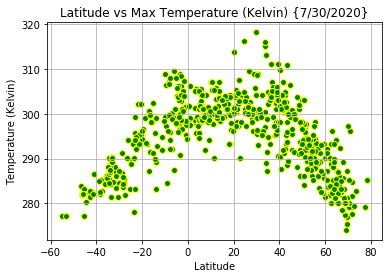

In [189]:
# plt.scatter((response_json['coord']['lat']),(response_json['main']['temp_max']))
plt.scatter(cleaned_lat, cleaned_max_temp, color = 'green', edgecolors = 'yellow')
plt.title("Latitude vs Max Temperature (Kelvin) {7/30/2020}")
plt.xlabel('Latitude')
plt.ylabel('Temperature (Kelvin)')
plt.grid()
plt.savefig('lat_vs_temp.png')


###### This data shows the temperautre relationship to latitude. Generally, the further from the equator the city is, the cooler the max temperuate is

## Latitude vs. Humidity Plot

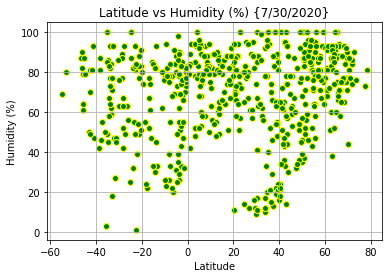

In [218]:
plt.scatter(cleaned_lat,cleaned_humidity, color = 'green', edgecolors = 'yellow')
plt.title("Latitude vs Humidity (%) {7/30/2020}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('lat_vs_humidity.png')

###### this data shows the relationship between the city's latitude coordinate and the humidity percentage; there does not appear to be any significant relationship between the two metrics

## Latitude vs. Cloudiness Plot

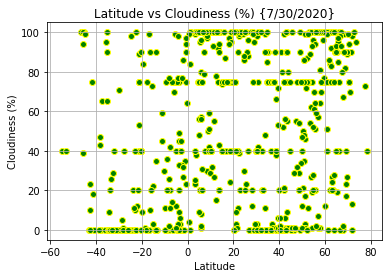

In [193]:
plt.scatter(cleaned_lat, cleaned_cloudiness,color = 'green', edgecolors = 'yellow')
plt.title("Latitude vs Cloudiness (%) {7/30/2020}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('lat_vs_cloudiness.png')

###### this data shows the relationship between the city's latitude coordinate and the cloudiness percentage; there does not appear to be any significant relationship between the two metrics

## Latitude vs. Wind Speed Plot

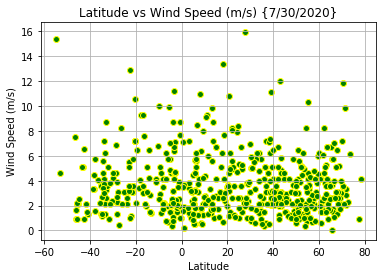

In [196]:
plt.scatter(cleaned_lat, cleaned_wind_speed, color = 'green', edgecolors = 'yellow')
plt.title("Latitude vs Wind Speed (m/s) {7/30/2020}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.savefig('latitude_vs_temp_north.png')

###### this data shows the relationship between the city's latitude coordinate and wind speed; there does not appear to be any significant relationship between the two metrics

## Linear Regression

In [122]:
# OPTIONAL: Create a function to create Linear Regression plots


In [117]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_df_cleaned[weather_df_cleaned.Lat > 0]
southern = weather_df_cleaned[weather_df_cleaned.Lat < 0]
southern.head()
northern.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
1,Albany,42.60,-73.97,304.26,33,6,2.57,US,1596040879
4,Qaanaaq,77.48,-69.36,279.09,73,73,0.90,GL,1596041227
7,Barrow,71.29,-156.79,279.15,75,90,9.80,US,1596041228
8,The Valley,18.22,-63.06,300.15,88,75,13.40,AI,1596041229
11,Yellowknife,62.46,-114.35,293.15,60,20,4.60,CA,1596041229


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [138]:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

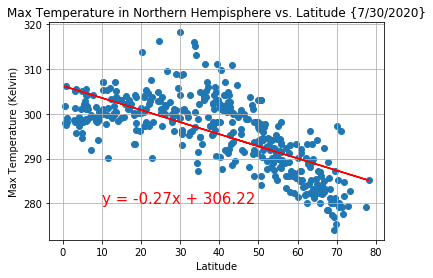

In [203]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Max Temp'])
reg_values = northern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern['Lat'], northern['Max Temp'])
#Lin regress plot
plt.plot(northern['Lat'],reg_values, 'r', )
plt.title('Max Temperature in Northern Hempisphere vs. Latitude {7/30/2020}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')
# plt.text(20, 50, linregress, ha = 'center', va = 'center')
plt.annotate(line_eq,(10,280),fontsize=15,color="red")
plt.grid()
plt.savefig('max_temp_vs_lat_north.png')



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

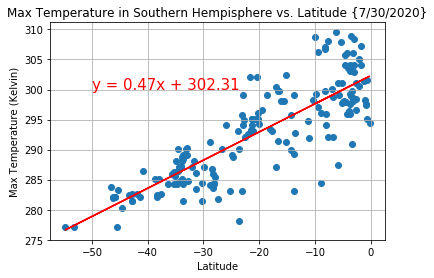

In [205]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'], southern['Max Temp'])
reg_values = southern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern['Lat'], southern['Max Temp'])
#Lin regress plot
plt.plot(southern['Lat'],reg_values, 'r')
plt.title('Max Temperature in Southern Hempisphere vs. Latitude {7/30/2020}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')
# plt.text(20, 50, linregress, ha = 'center', va = 'center')
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.grid()
plt.savefig('max_temp_vs_lat_south.png')



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

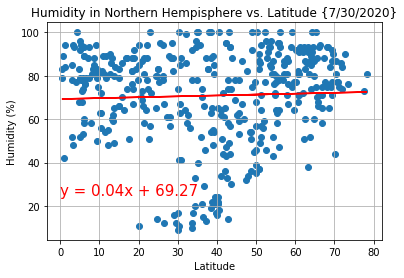

In [206]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Humidity'])
reg_values = northern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern['Lat'], northern['Humidity'])
#Lin regress plot
plt.plot(northern['Lat'],reg_values, 'r')
plt.title('Humidity in Northern Hempisphere vs. Latitude {7/30/2020}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# plt.text(20, 50, linregress, ha = 'center', va = 'center')
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.grid()
plt.savefig('humidity_vs_lat_north.png')



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

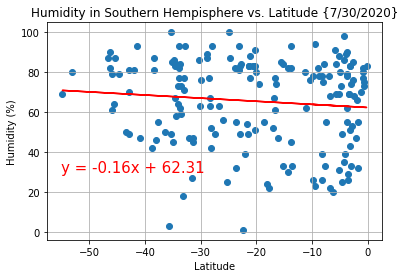

In [208]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'], southern['Humidity'])
reg_values = southern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern['Lat'], southern['Humidity'])
#Lin regress plot
plt.plot(southern['Lat'],reg_values, 'r')
plt.title('Humidity in Southern Hempisphere vs. Latitude {7/30/2020}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# plt.text(20, 50, linregress, ha = 'center', va = 'center')
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.grid()
plt.savefig('humidity_vs_lat_south.png')



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

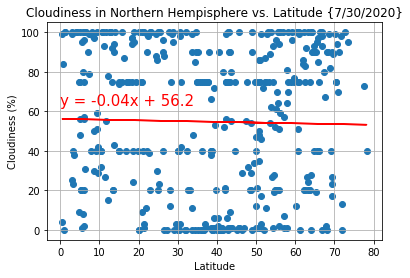

In [209]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Cloudiness (%)'])
reg_values = northern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern['Lat'], northern['Cloudiness (%)'])
#Lin regress plot
plt.plot(northern['Lat'],reg_values, 'r')
plt.title('Cloudiness in Northern Hempisphere vs. Latitude {7/30/2020}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# plt.text(20, 50, linregress, ha = 'center', va = 'center')
plt.annotate(line_eq,(0,63),fontsize=15,color="red")
plt.grid()
plt.savefig('cloudiness_vs_lat_north.png')



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

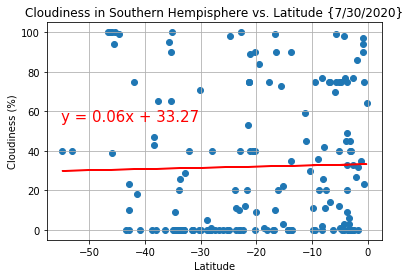

In [211]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'], southern['Cloudiness (%)'])
reg_values = southern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern['Lat'], southern['Cloudiness (%)'])
#Lin regress plot
plt.plot(southern['Lat'],reg_values, 'r')
plt.title('Cloudiness in Southern Hempisphere vs. Latitude {7/30/2020}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# plt.text(20, 50, linregress, ha = 'center', va = 'center')
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.grid()
plt.savefig('cloudiness_vs_lat_south.png')



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

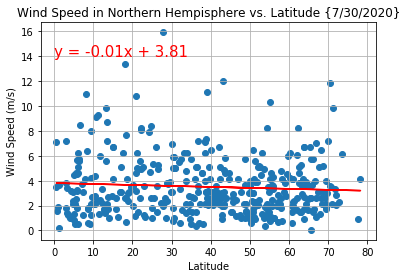

In [213]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Wind Speed (m/s)'])
reg_values = northern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern['Lat'], northern['Wind Speed (m/s)'])
#Lin regress plot
plt.plot(northern['Lat'],reg_values, 'r')
plt.title('Wind Speed in Northern Hempisphere vs. Latitude {7/30/2020}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# plt.text(20, 50, linregress, ha = 'center', va = 'center')
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
plt.grid()
plt.savefig('wind_speed_vs_lat_north.png')



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

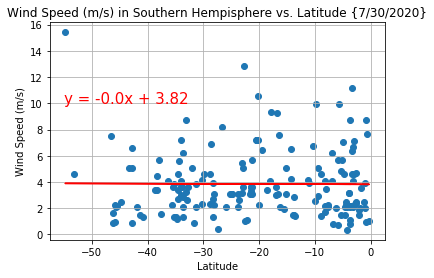

In [214]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['Lat'], southern['Wind Speed (m/s)'])
reg_values = southern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern['Lat'], southern['Wind Speed (m/s)'])
#Lin regress plot
plt.plot(southern['Lat'],reg_values, 'r')
plt.title('Wind Speed (m/s) in Southern Hempisphere vs. Latitude {7/30/2020}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# plt.text(20, 50, linregress, ha = 'center', va = 'center')
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.grid()
plt.savefig('wind_speed_vs_lat_south.png')

